In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from scipy.interpolate import Rbf

In [257]:
error=0.0006
lower=485
upper=1200
Num=600
num=200
Frame=230
tt='reflect'
cmapt='hot'
val=2
typ='linear'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
numbers=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500','0750']
label=['A','B','C']
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
xzs=np.linspace(0.4,0.5,3)
for x in xzs:
    yt=[]
    ytn=[]
    for k in ['AL-B','SiC-B']:
            T={}
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    for column in df.index:
                        if column>x-error and column<x+error:
                            y=df.loc[column].values[0]
                            #print(y)
                            ys.append(y)
                            yns.append(y)
                            break
                except Exception as e:
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    yns.append(np.nan)
                    pass
            T['{}'.format]=yns
            TT=DataFrame(T)
            TTT=TT.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
            Yns=TTT.values
            yt.append(ys)
            ytn.append(Yns)
            #ytn.append(yns)
    dfys['EEL_Compoent_{}_Line_{}'.format(x,i)]=yt
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df3 = pd.DataFrame.from_dict(dfys, orient='index')
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
#df2=dff3.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
#df3.to_csv('EELxx_{}.csv'.format(x))
a,b=df3.shape
#df2.to_csv('EELxx_{}.csv'.format(x))
stelement=['AlB','AlA','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}
newn=numbers.copy()
numbers.insert(-3,2800)
#numbers.insert(-3,2843.5)
numbers.insert(-3,2900)
numbers.insert(-2,3025)
numbers.insert(-7,2620)
numbers.insert(-4,2950)
numbers.insert(-7,2700)
numbers.insert(-6,2860)

In [258]:
numbers

[0,
 100,
 250,
 500,
 750,
 1000,
 1250,
 1500,
 1750,
 2000,
 2250,
 2500,
 2620,
 2750,
 2700,
 2800,
 2860,
 2900,
 2950,
 3000,
 3025,
 3050,
 3100]

0.0007591898121432905
6.880222377958489e-05
6.061987776462274e-05
-8.472454542562957e-05
0.00023352066128268234
0.0003055244643661581


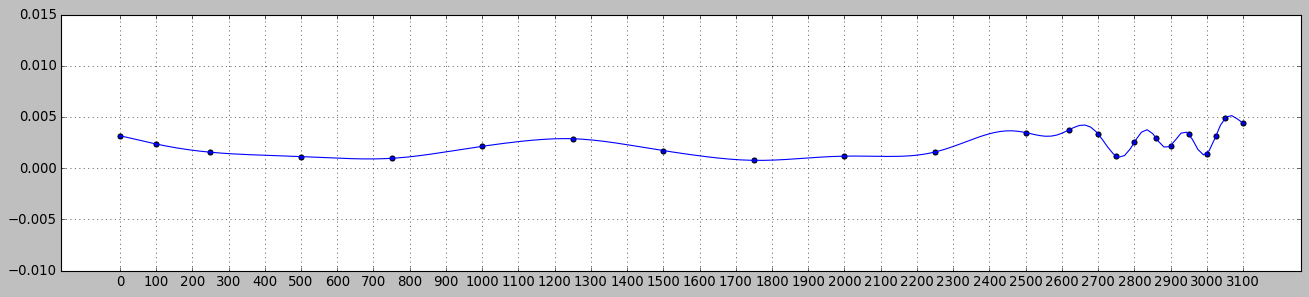

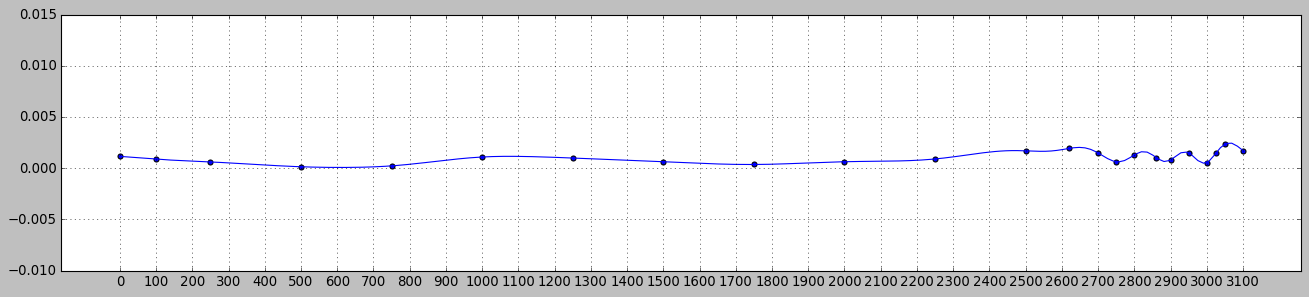

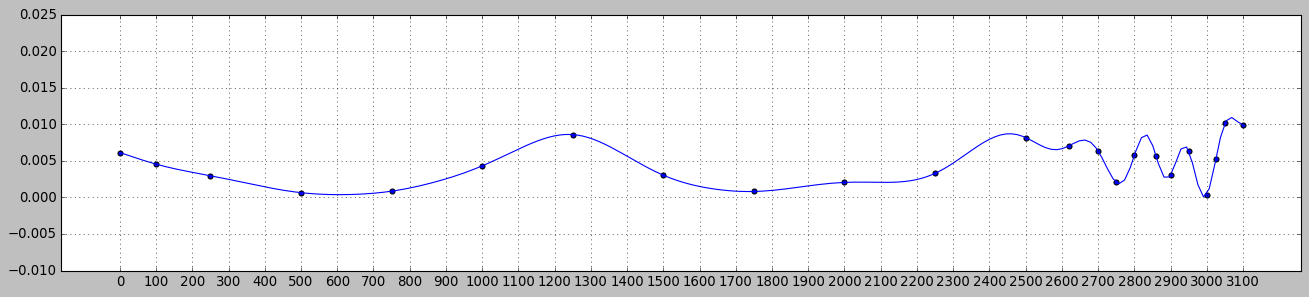

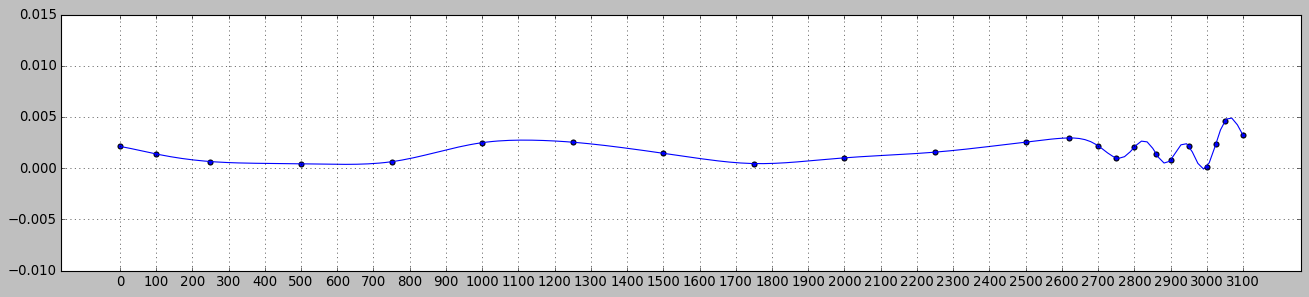

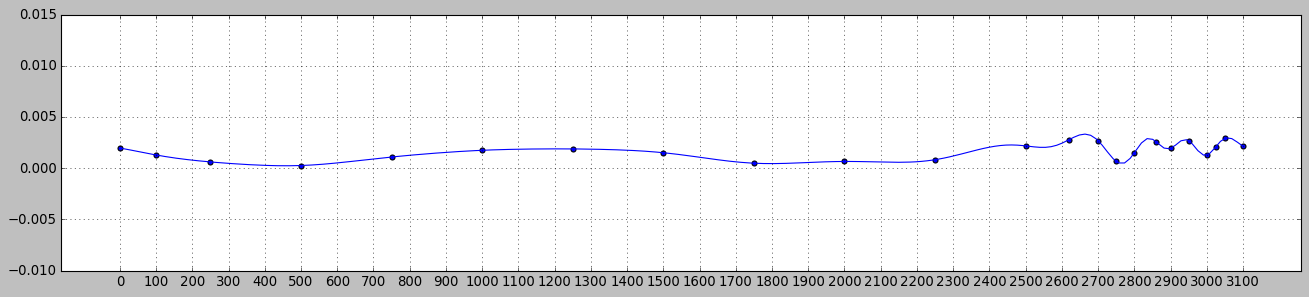

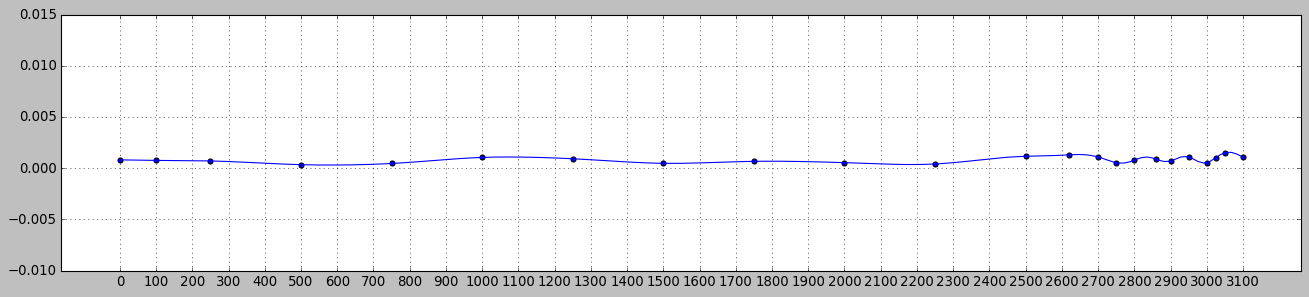

In [263]:
row,col=df2.shape
for i in range(1,row+1):
    for j in range(1,col+1):
        y=df2.iloc[i-1:i,j-1:j].values[0][0].flatten()
        ynn=np.insert(y,[-3,-2,-4,-7],[(y[-4]+y[-3])/2,(y[-3]+y[-2])/2,(y[-5]+y[-4])/2,(y[-7]+y[-8])/2])
        yn=np.insert(ynn,[-4,-7,-6],[(y[-4]+y[-5])/2,(y[-7]+y[-8])/2,(y[-6]+y[-7])/2])
        '''print(yn)
        print(y)'''
        fig= plt.figure(figsize=(20,4))
        axes=fig.add_subplot(1,1,1)
        plt.xticks(np.arange(0,3200,100))
        f = Rbf(numbers,yn,kind='quintic')
        plt.scatter(numbers,yn)
        plt.grid('on')
        xnew=np.linspace(0,3100,num)
        whole1['{}_{}'.format(i,j)]=f(xnew)
        plt.plot(xnew,f(xnew))
        print(min(f(xnew)))
finaldf1 =DataFrame(whole1)